
# 📊 Análisis Exploratorio de Datos (EDA) - FoodHub

<a href="https://colab.research.google.com/github/Antonio-Tresol/datascience_coursework/blob/main/homework_eda/EDA_FoodHub_Guia_de_Estudio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"> </a>

Este notebook te guiará a través de un análisis exploratorio de datos (EDA) utilizando datos de pedidos de la aplicación **FoodHub**. Aprenderás a inspeccionar, visualizar y comprender los datos paso a paso.

**Objetivo**: Comprender cómo realizar un EDA, en este caso, indagar sobre el comportamiento de los pedidos, los tipos de cocina más populares, los tiempos de entrega y otros aspectos clave, utilizando Python y  bibliotecas como pandas, matplotlib y seaborn.

Se encontrará con ejercicios para que desarrollen en las diferentes secciones.

## Contexto
El número de restaurantes en Nueva York está aumentando día a día. Muchos estudiantes y profesionales ocupados dependen de estos restaurantes debido a sus estilos de vida agitados. El servicio de entrega de comida a domicilio en línea es una excelente opción para ellos, ya que les permite recibir comida de sus restaurantes favoritos.

Una empresa agregadora de comida llamada FoodHub ofrece acceso a múltiples restaurantes a través de una única aplicación móvil.

La app permite que los restaurantes reciban pedidos en línea directamente de los clientes. Una vez que el restaurante confirma el pedido, la aplicación asigna un repartidor de la empresa para recogerlo. El repartidor utiliza un mapa para llegar al restaurante y espera el paquete de comida. Una vez recibido, confirma la recogida en la app y se dirige a la ubicación del cliente para entregar la comida. Al hacer la entrega, también confirma la entrega en la aplicación. El cliente puede calificar el pedido en la app. La empresa agregadora obtiene ingresos cobrando un margen fijo por cada pedido entregado.

## Objetivo del EDA
La empresa agregadora ha almacenado los datos de diferentes pedidos realizados por clientes registrados en su portal en línea. Desean analizar esta información para tener una mejor idea de la demanda de los distintos restaurantes, lo cual les ayudará a mejorar la experiencia del cliente.

Supón que eres un Científico de Datos en FoodHub y que se deben analizar los datos para hacer recomendaciones al negocio. Tu tarea es realizar un análisis de datos para encontrar respuestas que ayuden a la empresa a mejorar su negocio.

In [ ]:
# run this if you need to install the dependencies
# %pip install matplotlib seaborn pandas

## 📁 1. Carga de Datos y Exploración Inicial

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
dataset_url = "https://raw.githubusercontent.com/Antonio-Tresol/datascience_coursework/refs/heads/main/homework_eda/foodhub_order.csv"
# Cargar el dataset
foodhub_orders_data = pd.read_csv(dataset_url)
# Vista general de los datos
foodhub_orders_data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


## 🔍 2. Entendimiento General del Dataset

In [70]:
print("Filas y columnas:", foodhub_orders_data.shape, end="\n\n")

print("Tipos de datos:")
print(foodhub_orders_data.dtypes, end="\n\n")

print("Valores nulos por columna:")
print(foodhub_orders_data.isnull().sum())

Filas y columnas: (1898, 9)

Tipos de datos:
order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

Valores nulos por columna:
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


In [72]:
# Descripción estadística de los datos
foodhub_orders_data.describe()[
    [
        "cost_of_the_order",
        "food_preparation_time",
        "delivery_time",
    ]
].round(3)

,cost_of_the_order,food_preparation_time,delivery_time
count,1898.000,1898.000,1898.000
mean,16.499,27.372,24.162
std,7.484,4.632,4.973
min,4.470,20.000,15.000
25%,12.080,23.000,20.000
50%,14.140,27.000,25.000
75%,22.298,31.000,28.000
max,35.410,35.000,33.000


### 2.1. Inspección de Datos usando los tipos de datos correctos


Revisamos el ratings como enteros, retirando aquellas ordenes que tiene un rating no dado. Pero primero, veamos cuanto representan los ratings nulos en terminos de filas

In [106]:
number_of_records_without_rating = foodhub_orders_data[
    foodhub_orders_data["rating"] == "Not given"
]["rating"].count()
print(f"number of rows {foodhub_orders_data.shape[0]}")
print(f"number of rows without rating {number_of_records_without_rating}")
print(
    f"Percentage of rows without rating {(number_of_records_without_rating / foodhub_orders_data.shape[0]) * 100:.2f}"
)

number of rows 1898
number of rows without rating 736
Percentage of rows without rating 38.78


Sabiendo eso, revisando solo las filas con ratings podemos observar las medidas de tendencia central y de dispersión. 

In [107]:
ratings_without_nulls = foodhub_orders_data[
    foodhub_orders_data["rating"] != "Not given"
]
ratings_without_nulls = ratings_without_nulls[["rating"]]
ratings_without_nulls["rating"] = ratings_without_nulls["rating"].astype(int)
ratings_without_nulls.describe().round(3)

,rating
count,1162.000
mean,4.344
std,0.741
min,3.000
25%,4.000
50%,5.000
75%,5.000
max,5.000


En este set de datos, las columnas order_id, customer_id, restaurant_name, cuisine_type, day_of_the_week are strings, we are going to describe them too

In [89]:
foodhub_orders_data_correct_types = foodhub_orders_data.copy()
str_columns = [
    "order_id",
    "customer_id",
    "restaurant_name",
    "cuisine_type",
    "day_of_the_week",
]

for column in str_columns:
    foodhub_orders_data_correct_types[column] = foodhub_orders_data_correct_types[
        column
    ].astype(str)

foodhub_orders_data_correct_types[str_columns].describe()

,order_id,customer_id,restaurant_name,cuisine_type,day_of_the_week
count,1898,1898,1898,1898,1898
unique,1898,1200,178,14,2
top,1478056,52832,Shake Shack,American,Weekend
freq,1,13,219,584,1351


## 📊 3. Análisis Univariado

### ➤ Categóricas

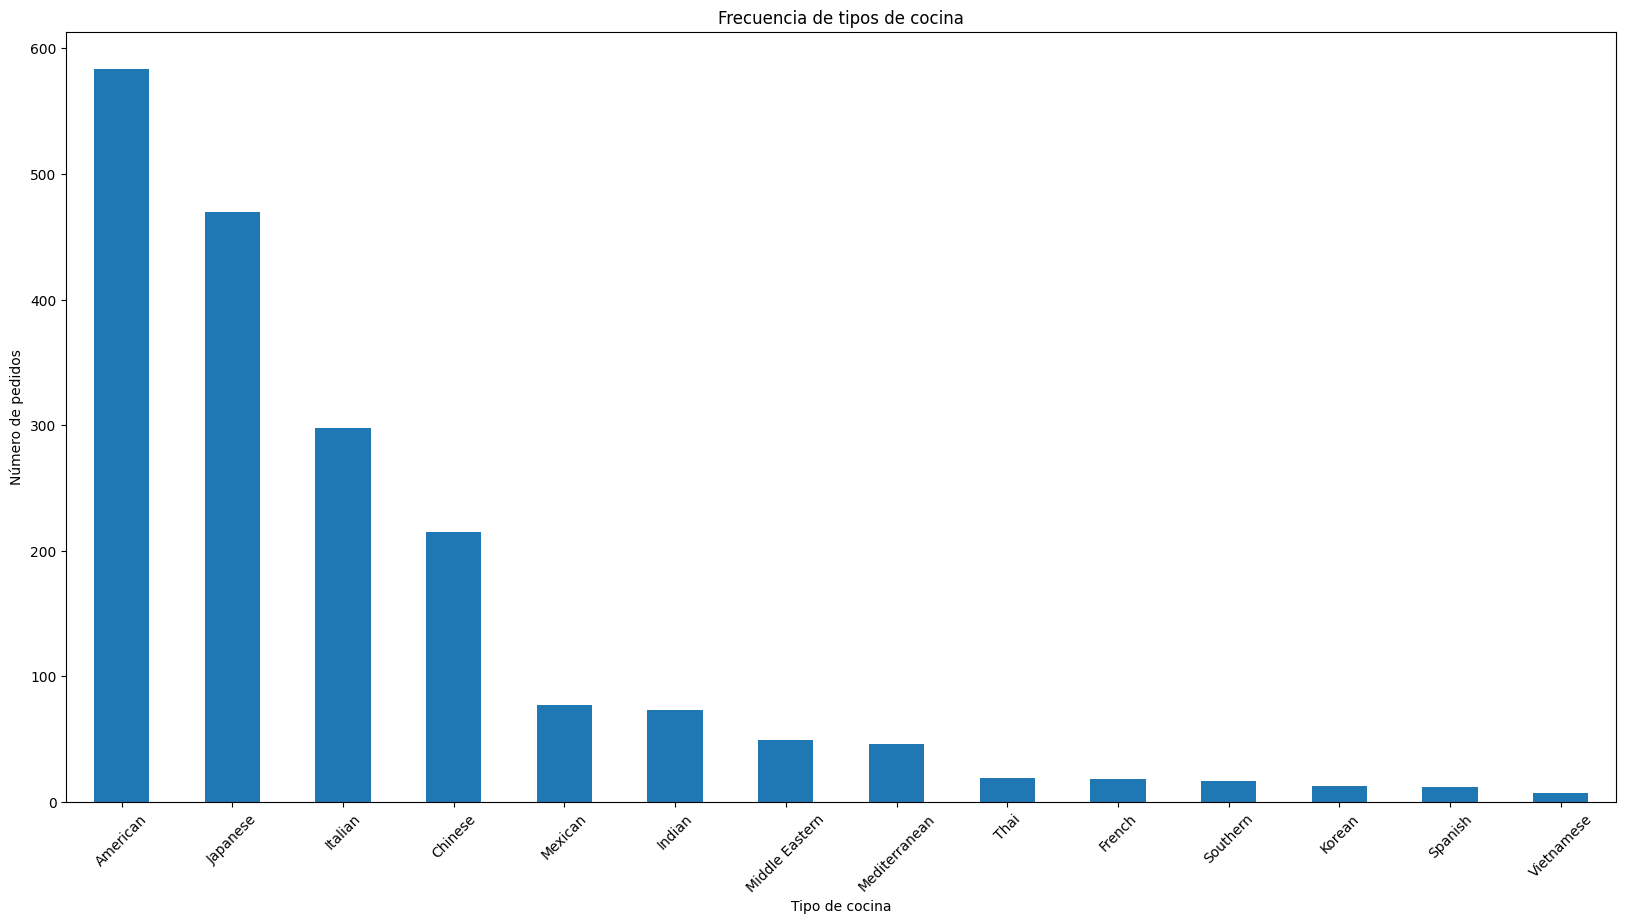

In [112]:
foodhub_orders_data["cuisine_type"].value_counts().plot(
    kind="bar",
    figsize=(20, 10),
    title="Frecuencia de tipos de cocina",
)
plt.ylabel("Número de pedidos")
plt.xlabel("Tipo de cocina")
plt.xticks(rotation=45)
plt.show()

### 🧪 Ejercicio 1

👉 Crea una gráfica de barras para visualizar los restaurantes con más pedidos.

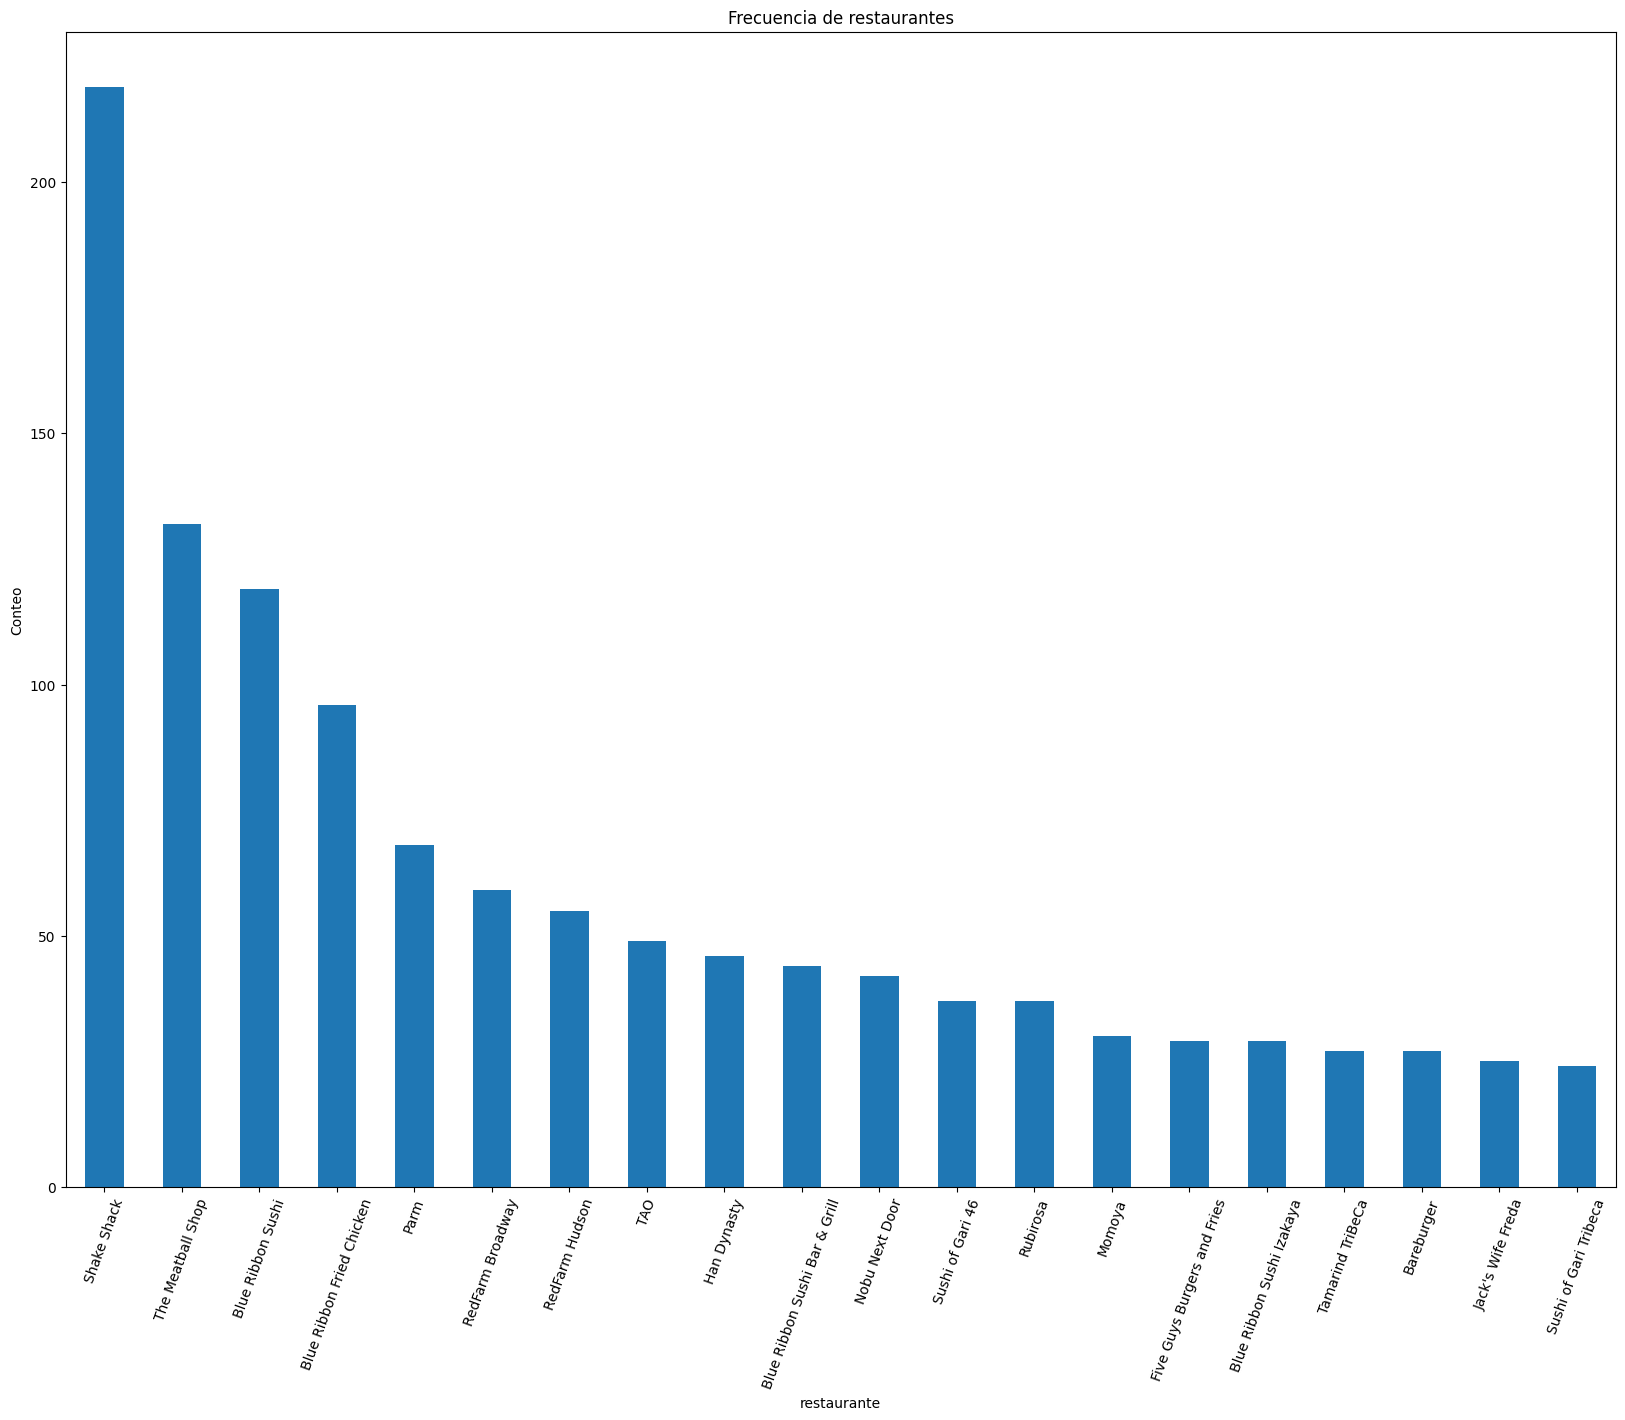

restaurant_name
Shake Shack                      219
The Meatball Shop                132
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Parm                              68
RedFarm Broadway                  59
RedFarm Hudson                    55
TAO                               49
Han Dynasty                       46
Blue Ribbon Sushi Bar & Grill     44
Nobu Next Door                    42
Sushi of Gari 46                  37
Rubirosa                          37
Momoya                            30
Five Guys Burgers and Fries       29
Blue Ribbon Sushi Izakaya         29
Tamarind TriBeCa                  27
Bareburger                        27
Jack's Wife Freda                 25
Sushi of Gari Tribeca             24
Name: count, dtype: int64

In [ ]:
restaurant_data = foodhub_orders_data["restaurant_name"].value_counts()
restaurant_data.head(n=20).plot(
    kind="bar",
    figsize=(20, 15),
    title="Frecuencia de restaurantes",
)
plt.ylabel("Conteo")
plt.xlabel("restaurante")
plt.xticks(rotation=70)
plt.show()
restaurant_data.head(n=20)

### 🧪 Ejercicio 2

👉 Analiza el campo day_of_the_week, cuantos valores tiene, cuál es la distribución de pedidos por esta variable

pedidos entre semana 547
pedidos en fin de semana 1351


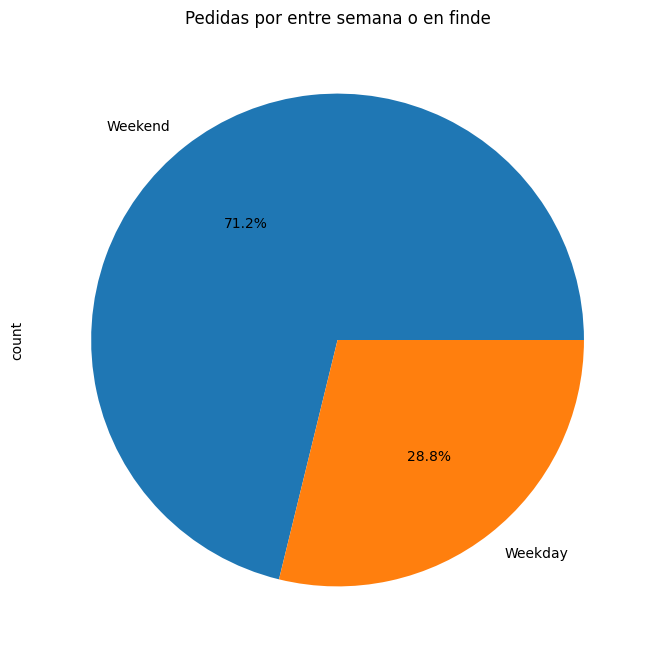

In [150]:
# Escribe tu código aquí
records_in_weekend = foodhub_orders_data[
    foodhub_orders_data["day_of_the_week"] == "Weekend"
].shape[0]
records_in_weekday = foodhub_orders_data.shape[0] - records_in_weekend
print(f"pedidos entre semana {records_in_weekday}")
print(f"pedidos en fin de semana {records_in_weekend}")

foodhub_orders_data["day_of_the_week"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",  # to add labels to the chard
    figsize=(12, 8),
    title="Pedidas por entre semana o en finde",
)
plt.show()

### ➤ Numéricas

#### Rating

In [147]:
# Ver cuántas órdenes no tienen rating y cuantas evaluaciones ha recibido cada rating
foodhub_orders_data["rating"].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

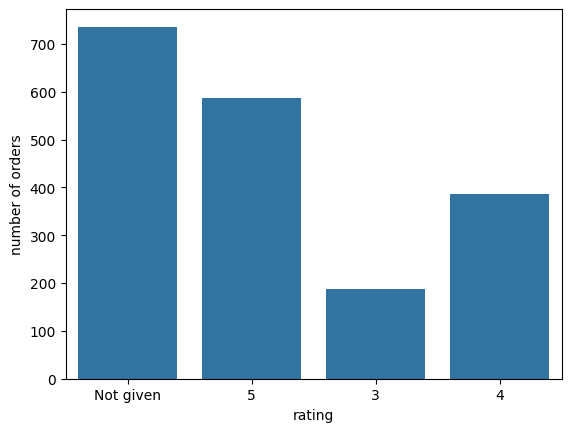

In [ ]:
# Gráfico de barras de número de ordenes por rating
sns.countplot(data=foodhub_orders_data, x="rating")
plt.ylabel("number of orders")
plt.show()

### 🧪 Ejercicio 3

👉 Crea un pie chart para ver el porcentaje de órdenes por cada rating

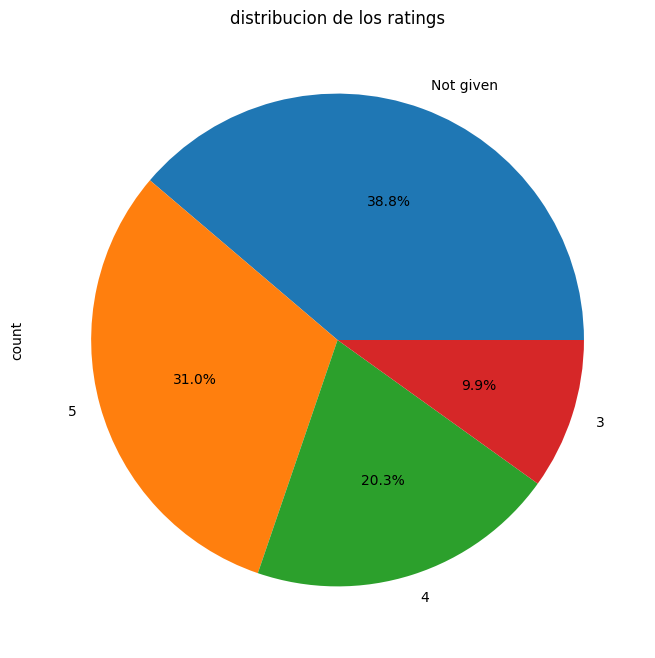

,rating
count,1898
unique,4
top,Not given
freq,736


In [156]:
# Escribe tu código aquí
foodhub_orders_data["rating"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",  # to add labels to the chard
    figsize=(12, 8),
    title="distribucion de los ratings",
)
plt.show()
foodhub_orders_data[["rating"]].describe()

#### Costo de Pedidos

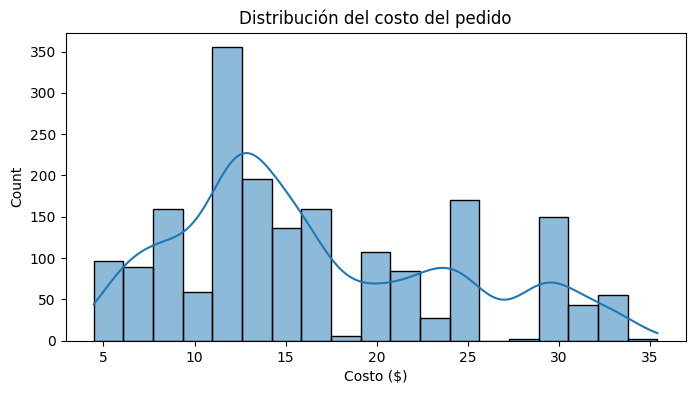

,cost_of_the_order
count,1898.000
mean,16.499
std,7.484
min,4.470
25%,12.080
50%,14.140
75%,22.298
max,35.410


In [155]:
# Ver una distribución del costo de los pedidos.
plt.figure(figsize=(8, 4))
sns.histplot(foodhub_orders_data["cost_of_the_order"], kde=True)
plt.title("Distribución del costo del pedido")
plt.xlabel("Costo ($)")
plt.show()
foodhub_orders_data[["cost_of_the_order"]].describe().round(3)

In [ ]:
# Gráfico de Caja de Costo de la orden
sns.boxplot(
    data=foodhub_orders_data,
    x="cost_of_the_order",
)  ## Boxplot for the cost of order
plt.title("Costo de Orden: Boxplot")
plt.xlabel("costo de la orden")
plt.show()

#### Tiempo de preparación de comida

In [ ]:
sns.histplot(
    data=foodhub_orders_data, x="food_preparation_time"
)  ## Complete the code to plot the histogram for the cost of order
plt.ylabel("número de ordenes")
plt.xlabel("tiempo de preparación")
plt.show()
sns.boxplot(
    data=foodhub_orders_data, x="food_preparation_time"
)  ## Complete the code to plot the boxplot for the cost of order
plt.xlabel("tiempo de preparación")
plt.show()

#### Tiempo de entrega

In [ ]:
sns.histplot(data=foodhub_orders_data, x="delivery_time")
plt.ylabel("número de ordenes")
plt.xlabel("tiempo de entrega")
plt.show()
sns.boxplot(data=foodhub_orders_data, x="delivery_time")
plt.xlabel("tiempo de entrega")
plt.show()

#### Restaurantes

### 🧪 Ejercicio 4

👉 Da el top 5 de restaurantes según número de órdenes

## 📈 4. Análisis Bivariado

### ➤ Preparación vs Entrega

In [ ]:
sns.scatterplot(data=foodhub_orders_data, x="food_preparation_time", y="delivery_time")
plt.title("Preparación vs Entrega")
plt.show()

### ➤ Costo por Día de la Semana

In [ ]:
sns.boxplot(data=foodhub_orders_data, x="day_of_the_week", y="cost_of_the_order")
plt.title("Costo según día de la semana")
plt.show()

### 🧪 Ejercicio 5

👉 Que Tipo de cocina es más popular los fines de semana

In [23]:
# Escribe aquí tu respuesta

### 🧪 Ejercicio 6

👉 Visualiza la distribución de calificaciones (`rating`) por tipo de cocina.

In [24]:
# Escribe tu código aquí

## 📉 5. Análisis Multivariado

In [ ]:
# Correlación de variables numéricas

foodhub_orders_data[
    ["delivery_time", "food_preparation_time", "cost_of_the_order"]
].corr()

In [ ]:
# ver correlación con un heatmap
sns.heatmap(
    foodhub_orders_data[
        ["delivery_time", "food_preparation_time", "cost_of_the_order"]
    ].corr()
)

In [ ]:
grouped = (
    foodhub_orders_data.groupby(["day_of_the_week", "cuisine_type"])[
        ["cost_of_the_order"]
    ]
    .mean()
    .unstack()
)
grouped.plot(kind="bar", figsize=(12, 6))
plt.title("Costo promedio por tipo de cocina y día")
plt.ylabel("Costo promedio ($)")
plt.xticks(rotation=0)

plt.legend(title="Tipo de cocina", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()  # Ajusta el espacio para evitar recortes

plt.show()

In [ ]:
# Relación entre costo de la orden y tipo de cocina
plt.figure(figsize=(15, 7))
plt.title("Costo de Orden por tipo de cocina")
sns.boxplot(
    x="cuisine_type", y="cost_of_the_order", data=foodhub_orders_data, palette="PuBu"
)
plt.xlabel("Tipo de Cocina")
plt.ylabel("Costo de Orden")
plt.xticks(rotation=60)
plt.show()

In [ ]:
# Ver distirvución de prepación de comida y costo de orden para la comida mediterránea
sns.scatterplot(
    data=foodhub_orders_data[foodhub_orders_data["cuisine_type"] == "Mediterranean"],
    x="food_preparation_time",
    y="cost_of_the_order",
)
plt.show()

### 🧪 Ejercicio 7

👉 Visualiza la relación entre el tipo de cocina y el tiempo de preparación


In [30]:
# Escribe respuesta aquí

In [ ]:
# Relación entre el día de la semana y el tiempo de entrega
plt.figure(figsize=(15, 7))
sns.boxplot(data=foodhub_orders_data, x="day_of_the_week", y="delivery_time")
plt.show()

## 🧽 6. Limpieza de Datos (si aplica)

In [ ]:
print(foodhub_orders_data["rating"].value_counts())
foodhub_orders_data["rating"] = pd.to_numeric(
    foodhub_orders_data["rating"], errors="coerce"
)
print(foodhub_orders_data["rating"].isnull().sum())

## ✅ 7. Conclusiones

Responde las siguientes preguntas

**7.1** - ¿Qué tipos de cocina son más comunes?

**7.2** - ¿Existen días con pedidos más costosos?

**7.3** - ¿Hay relación entre tiempos de entrega y preparación?

**7.4** - ¿Hay relación entre el rating y los tiempos de entrega y preparación?

**7.5** - ¿Hay relación entre el rating y el costo de la orden?

**7.6** - La empresa desea ofrecer una promoción publicitaria para ciertos restaurantes. La condición para acceder a esta oferta es que:

* El restaurante debe tener más de 50 calificaciones (ratings), y

* La calificación promedio debe ser mayor a 4.

  ¿Cuáles restaurantes cumplen con estos criterios para recibir la oferta promocional?

**7.7** - La empresa cobra a los restaurantes una comisión del 25% en los pedidos cuyo costo sea mayor a 20 dólares, y una comisión del 15% en los pedidos con un costo mayor a 5 dólares.

  Calcula el ingreso neto total generado por la empresa a partir de todos los pedidos.

**7.8** - Brinda tres recomendaciones a la empresa sobre cómo puede aumentar sus ganancias.
